<a href="https://colab.research.google.com/github/JoseHelioF/GeraDatasetNoticias/blob/main/NoticiasDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
lista_noticias=[]
lista_categoria=[]

In [74]:
def topicos(base,var):    
    paginas = (i for i in range(1,20))
   
    for pagina in paginas:
        
        fim=f'/index/feed/pagina-{pagina}.ghtml'
        endereco=base+var+fim
        response=requests.get(endereco)
        content=response.content
        #Armazena como HTML
        site=BeautifulSoup(content,'html.parser')
        #Separa as notícias atravez da tag html
        noticias=site.findAll('div',attrs={'class':'feed-post bstn-item-shape type-materia'})
        print(pagina,var)
        for noticia in noticias:
            lista_noticias.append(noticia.text)
            lista_categoria.append(var)

In [75]:
base = 'https://g1.globo.com/'
Topico_var=['economia','ciencia','economia/agronegocios','carnaval/2022','educacao','empreendedorismo','inovacao']

for var in Topico_var:
    topicos(base,var)


1 economia
2 economia
3 economia
4 economia
5 economia
6 economia
7 economia
8 economia
9 economia
10 economia
11 economia
12 economia
13 economia
14 economia
15 economia
16 economia
17 economia
18 economia
19 economia
1 ciencia
2 ciencia
3 ciencia
4 ciencia
5 ciencia
6 ciencia
7 ciencia
8 ciencia
9 ciencia
10 ciencia
11 ciencia
12 ciencia
13 ciencia
14 ciencia
15 ciencia
16 ciencia
17 ciencia
18 ciencia
19 ciencia
1 economia/agronegocios
2 economia/agronegocios
3 economia/agronegocios
4 economia/agronegocios
5 economia/agronegocios
6 economia/agronegocios
7 economia/agronegocios
8 economia/agronegocios
9 economia/agronegocios
10 economia/agronegocios
11 economia/agronegocios
12 economia/agronegocios
13 economia/agronegocios
14 economia/agronegocios
15 economia/agronegocios
16 economia/agronegocios
17 economia/agronegocios
18 economia/agronegocios
19 economia/agronegocios
1 carnaval/2022
2 carnaval/2022
3 carnaval/2022
4 carnaval/2022
5 carnaval/2022
6 carnaval/2022
7 carnaval/2022
8 c

In [76]:
#Salvando CSV
dfn = pd.DataFrame(lista_noticias, columns=['Textos_da_noticia'])
dfc = pd.DataFrame(lista_categoria, columns=['Categoria'])
df = dfn.join(dfc)
df.to_csv('basenoticia.csv',index_label=None)


In [77]:
from google.colab import files
files.download('basenoticia.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [78]:
d = pd.read_csv('basenoticia.csv',sep=",").iloc[:,1:]
d

,Textos_da_noticia,Categoria
0,Atividade industrialConfiança da indústria cai...,economia
1,Como funciona o seguro de carro no EUA?Entenda...,economia
2,Empréstimos consignados do Auxílio Brasil soma...,economia
3,Ibovespa fecha em leve queda nesta segunda-fei...,economia
4,Juro médio cobrado pelos bancos avança para 42...,economia
...,...,...
980,Peixe dourado consegue dirigir veículo em terr...,inovacao
981,CES 2022: garçons robôs e carros que mudam de ...,inovacao
982,"Ameca, robô humanoide que impressiona pelas ex...",inovacao
983,Carro muda de cor com apenas um toque no botão...,inovacao


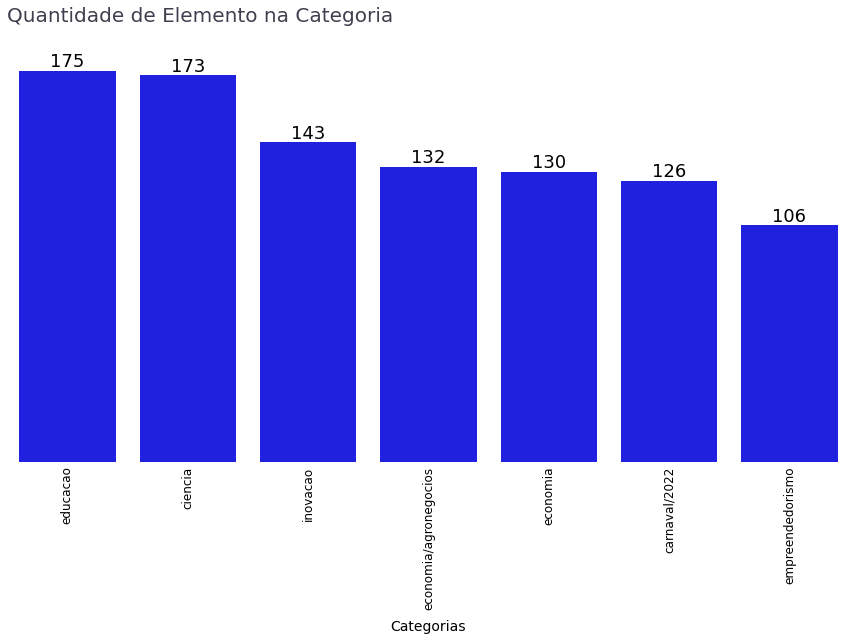

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# d = pd.value_counts(d.Categoria)
dado = pd.DataFrame()
dado['Categoria'] = pd.value_counts(d.Categoria).index
dado['Valor'] = pd.value_counts(d.Categoria).values

fig, ax = plt.subplots(figsize=(12,9))

sns.barplot(x='Categoria',y='Valor',data=dado,ax=ax,palette=['blue'])
ax.set_frame_on(False)
ax.set_title('Quantidade de Elemento na Categoria',loc='left',pad=30,fontdict={'fontsize':20},color='#3f3f4e')
ax.get_yaxis().set_visible(False)
ax.tick_params(axis='x',length=0,labelsize=12,colors='black',rotation = 90)
ax.set_xlabel('Categorias',labelpad=10,fontdict={'fontsize':14},color='black')
for retangulo in ax.patches:
  ax.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height() + 2,
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'),
          ha = 'center',
          fontsize=18,color='black')
plt.tight_layout();